In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.sparse import csr_matrix
from wordcloud import wordcloud
import visualisation
import nettoyage
import feature_creation
import Propre.algo as algo

# Charger les données 
data_train = np.load('data_train.npy', allow_pickle = True)
labels_train = pd.read_csv('label_train.csv')['label'].values
vocab_map = np.load('vocab_map.npy', allow_pickle = True)
data_test = np.load('data_test.npy')
vocab_map_test = np.load('vocab_map.npy', allow_pickle = True)



ModuleNotFoundError: No module named 'nettoyage'

## Visualisation des données 

### Distribution des mots 

Les 25 mots les plus fréquents et leurs fréquences :
the: 73152
of: 49639
and: 34627
to: 32837
in: 27577
we: 21430
is: 17533
for: 16982
that: 15726
on: 12937
this: 12482
with: 10064
as: 8783
are: 8586
by: 7978
an: 7580
learning: 6702
our: 6575
data: 6133
can: 6129
which: 6118
from: 6037
be: 5997
model: 5923
based: 5411


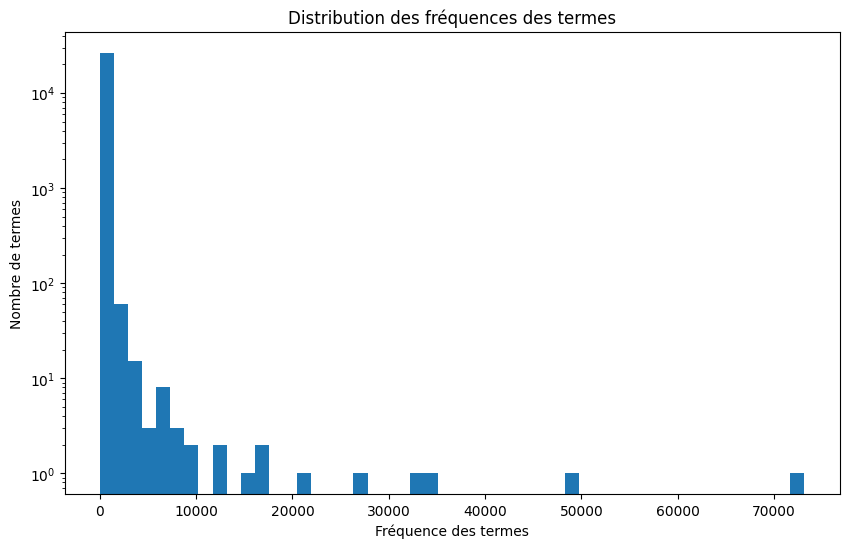

In [2]:
visualisation.distribution_mot(data_train,labels_train,vocab_map)

### Fréquence des Termes et Loi de Zipf

Loi de Zipf : Si la distribution des fréquences des termes suit une loi de Zipf, le graphique log-log devrait apparaître comme une ligne droite avec une pente négative.

Fréquence du terme le plus fréquent : 73152
Fréquence moyenne des termes : 48.96


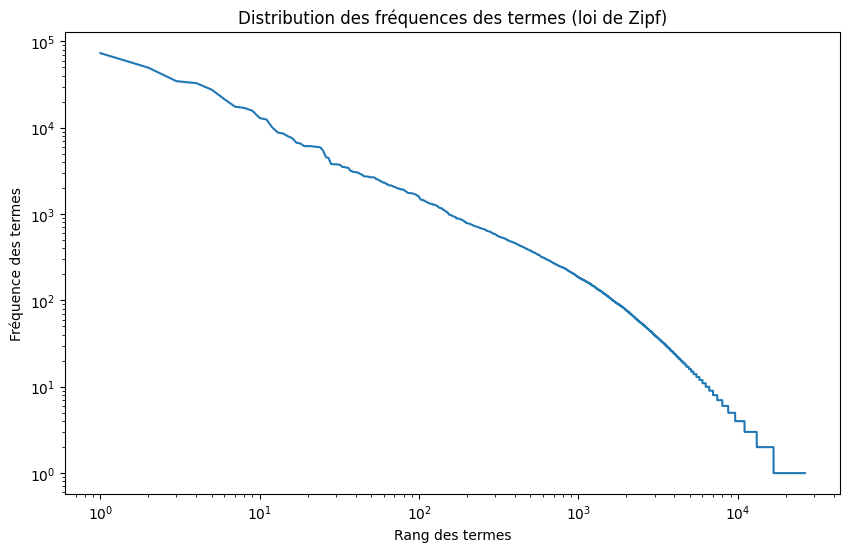

In [3]:
visualisation.loi_de_Zipf(data_train,labels_train,vocab_map)

### Nuage de mots de termes les plus fréquents 

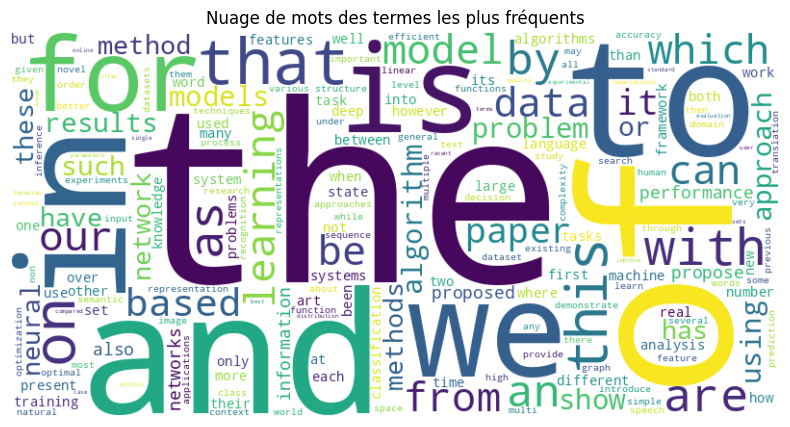

In [4]:
visualisation.nuage_termes_frequent(data_train,labels_train,vocab_map)

### Distribution Cumulée des Fréquences des Termes

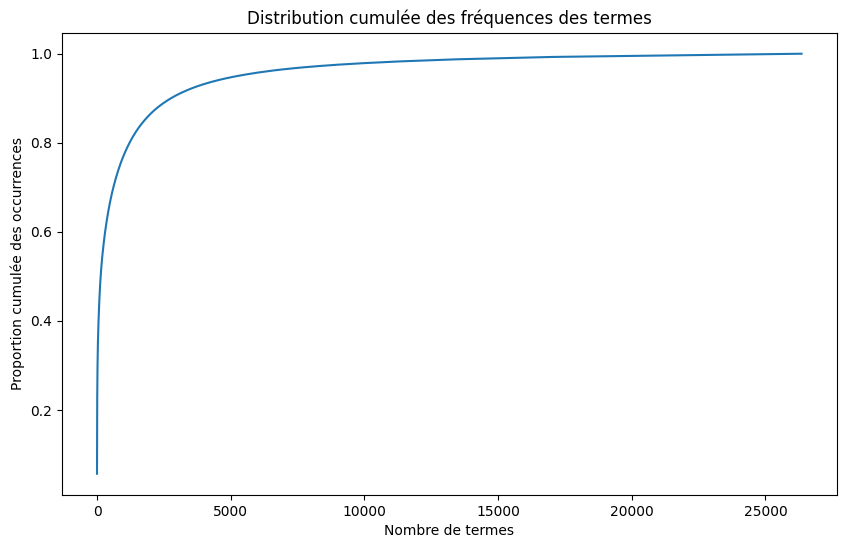

Nombre de termes responsables de 50% des occurrences : 137
Nombre de termes responsables de 80% des occurrences : 1217
Nombre de termes responsables de 90% des occurrences : 2767
Nombre de termes responsables de 95% des occurrences : 5252
Nombre de termes responsables de 98% des occurrences : 10357


In [5]:
visualisation.distribution_cumule_frequence_termes(data_train,labels_train,vocab_map)

### Distribution des Longueur des Documents

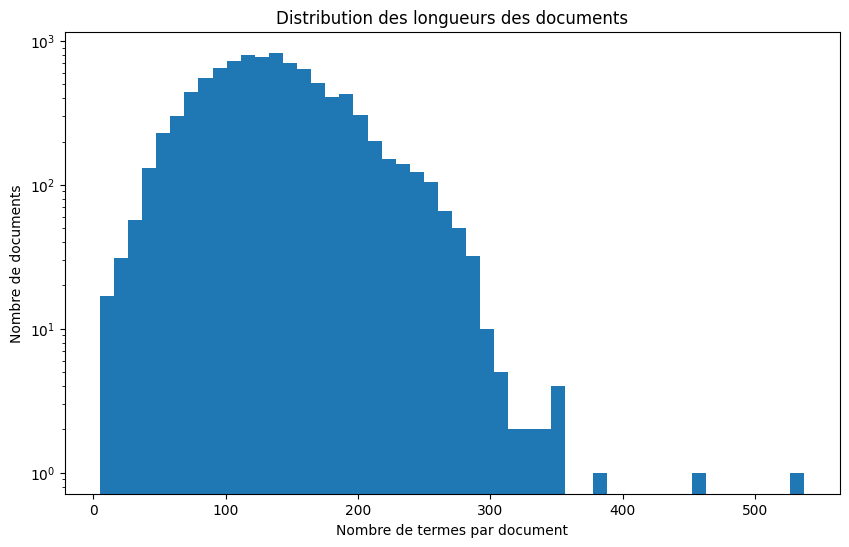

Nombre moyen de termes par document : 136.95298238165995
Nombre minimum de termes dans un document : 5
Nombre maximum de termes dans un document : 537


In [3]:
visualisation.distribution_longueur_document(data_train, labels_train, vocab_map)

## Visualisation des classes 

### Distribution des classses 

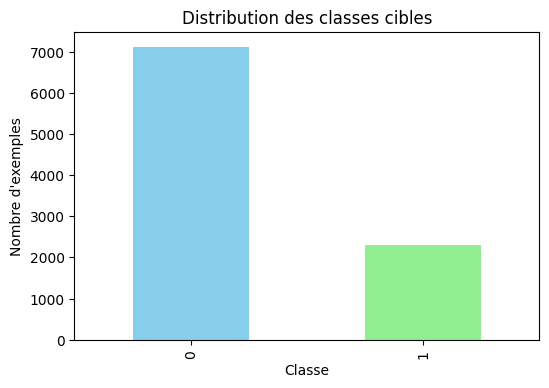

Proportion de la classe 0 : 0.76
Proportion de la classe 1 : 0.24


In [6]:
visualisation.distribution_classes(data_train, labels_train, vocab_map)

### Analyse de la longueur des documents par classe

Longueur moyenne des documents (classe 0) : 138.87
Longueur moyenne des documents (classe 1) : 131.02


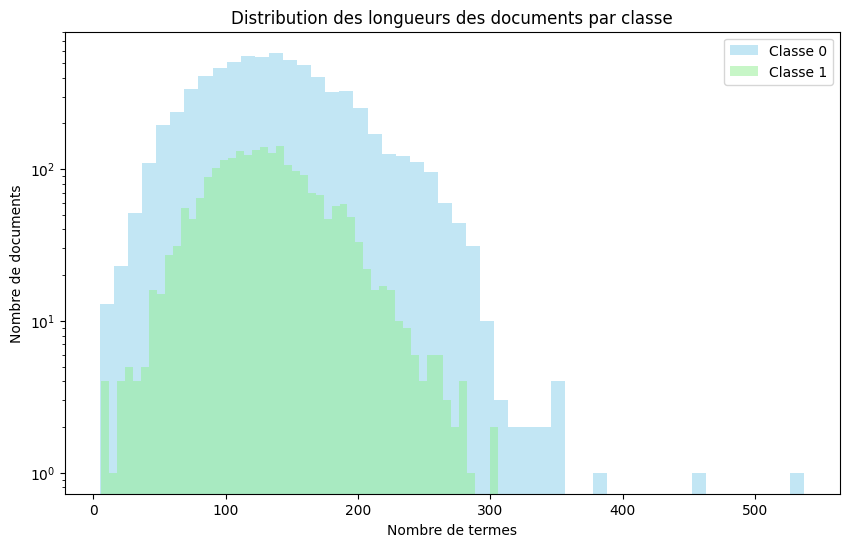

In [7]:
visualisation.distribution_document_par_classe(data_train, labels_train, vocab_map)

### Identification des termes distinctifs 

In [2]:
visualisation.print_top_terms_per_class(data_train,labels_train,vocab_map,25)


Classe 0 :
Terme : the, Fréquence : 57023
Terme : of, Fréquence : 38962
Terme : and, Fréquence : 27027
Terme : to, Fréquence : 25404
Terme : in, Fréquence : 21574
Terme : we, Fréquence : 15358
Terme : is, Fréquence : 13760
Terme : for, Fréquence : 13066
Terme : that, Fréquence : 11476
Terme : this, Fréquence : 9794
Terme : on, Fréquence : 9506
Terme : with, Fréquence : 7602
Terme : are, Fréquence : 6786
Terme : as, Fréquence : 6750
Terme : by, Fréquence : 6053
Terme : an, Fréquence : 5939
Terme : data, Fréquence : 4805
Terme : learning, Fréquence : 4745
Terme : be, Fréquence : 4726
Terme : from, Fréquence : 4669
Terme : which, Fréquence : 4626
Terme : can, Fréquence : 4592
Terme : our, Fréquence : 4522
Terme : based, Fréquence : 4302
Terme : model, Fréquence : 4141

Classe 1 :
Terme : the, Fréquence : 16129
Terme : of, Fréquence : 10677
Terme : and, Fréquence : 7600
Terme : to, Fréquence : 7433
Terme : we, Fréquence : 6072
Terme : in, Fréquence : 6003
Terme : that, Fréquence : 4250
Te

In [4]:
class_0_terms_df, class_1_terms_df = visualisation.find_distinctive_terms(data_train, labels_train, vocab_map, top_n=10)
print("Termes les plus distinctifs pour la classe 0 :")
print(class_0_terms_df)

print("\nTermes les plus distinctifs pour la classe 1 :")
print(class_1_terms_df)

Termes les plus distinctifs pour la classe 0 :
     Term     Score
0     the -0.006887
1      of -0.005754
2     and -0.003399
3      in -0.002907
4      to -0.002311
5      is -0.002024
6    this -0.001432
7  system -0.001228
8     are -0.001182
9   paper -0.001061

Termes les plus distinctifs pour la classe 1 :
       Term     Score
9        we  0.003424
8       our  0.001819
7      that  0.001682
6    models  0.001643
5     model  0.001367
4  learning  0.001307
3    neural  0.001301
2        on  0.001120
1      show  0.000938
0       art  0.000824


### Extraction des mots spécifiques par classe 


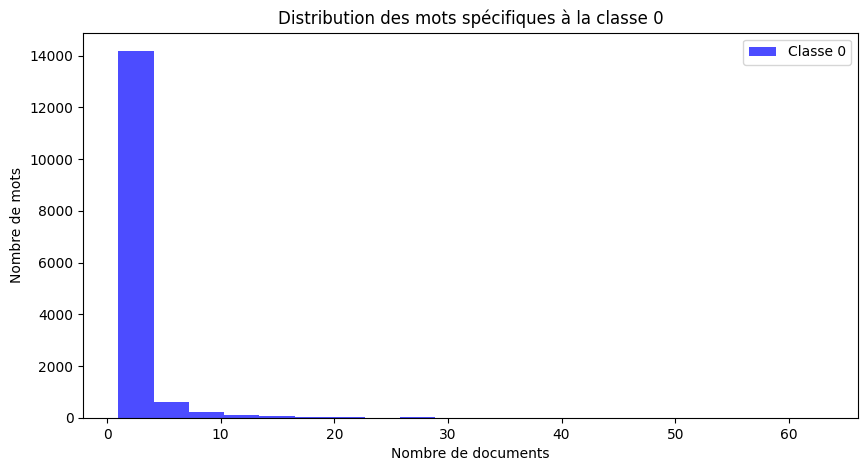

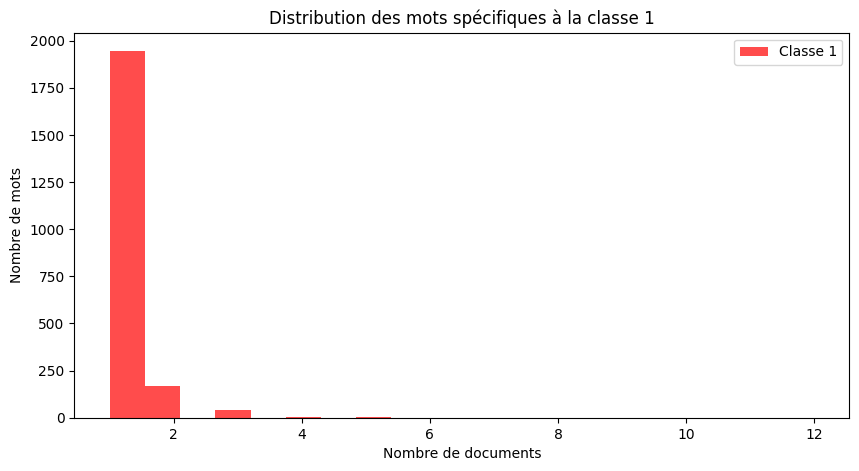

Nombre de mots spécifiques à la classe 0 : 15207
Nombre de mots spécifiques à la classe 1 : 2162
Mots spécifiques à la classe 0 :
genetic: 63 documents
asr: 47 documents
shafer: 39 documents
diagram: 36 documents
epistemic: 36 documents
outline: 35 documents
scientists: 32 documents
infrastructure: 31 documents
dempster: 30 documents
reactive: 30 documents
refinement: 30 documents
evolved: 29 documents
analysing: 28 documents
automation: 28 documents
researches: 28 documents
retrieve: 28 documents
volumes: 28 documents
swarm: 27 documents
travel: 27 documents
ontological: 26 documents
timely: 26 documents
hindi: 25 documents
malware: 25 documents
descriptors: 24 documents
driver: 24 documents
automate: 23 documents
clause: 23 documents
quick: 23 documents
technological: 23 documents
behaviours: 22 documents
cooperation: 22 documents
imprecise: 22 documents
metaheuristic: 22 documents
rough: 22 documents
script: 21 documents
cyber: 20 documents
fitness: 20 documents
mel: 20 documents
re

In [8]:
# Obtenir les mots spécifiques
mots_classe_0, mots_classe_1 = visualisation.class_specific_words(data_train, labels_train, vocab_map)

# Afficher les mots spécifiques avec leurs fréquences
print("Mots spécifiques à la classe 0 :")
for mot, freq in mots_classe_0[:100]:  # Affiche les 10 premiers mots
    print(f"{mot}: {freq} documents")

print("\nMots spécifiques à la classe 1 :")
for mot, freq in mots_classe_1[:50]:  # Affiche les 10 premiers mots
    print(f"{mot}: {freq} documents")

### Nuage de mots pour la classe 0 

In [ ]:
visualisation.nuage_classe0(data_train, labels_train, vocab_map)

### Nuage de mots pour la classe 1

In [ ]:
visualisation.nuage_classe1(data_train, labels_train, vocab_map)

### Extraction des années mentionnée par classe

In [ ]:
# Extraire et afficher les années et leurs fréquences par classe
years_by_class = visualisation.extract_years_from_class(data_train, labels_train, vocab_map)

for class_label, years in years_by_class.items():
    print(f"Classe {class_label} :")
    for year, frequency in years.items():
        print(f"Année : {year}, Fréquence : {frequency}")

## Nettoyage des données 

### Lemmatisation des mots

In [3]:
# Appliquer la lemmatisation
lemmatized_data_train, lemmatized_vocab = nettoyage.lemmatize_data(data_train, vocab_map)
lemmatized_data_test, lemmatized_vocab = nettoyage.lemmatize_data(data_test, vocab_map)

print("Matrice terme-document après lemmatisation :")
print(lemmatized_data_train.shape)

print("\nVocabulaire après lemmatisation :")
print(lemmatized_vocab)

Matrice terme-document après lemmatisation :
(9422, 23693)

Vocabulaire après lemmatisation :
['00' '000' '0001' ... 'zps' 'zsda' 'zsl']


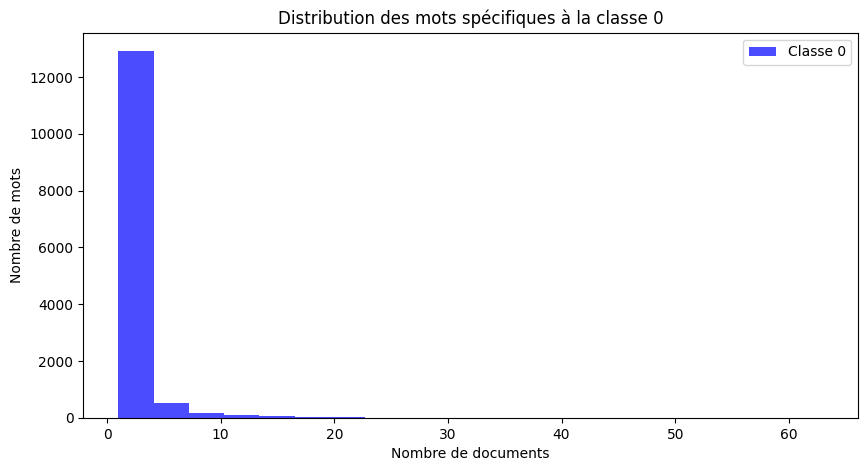

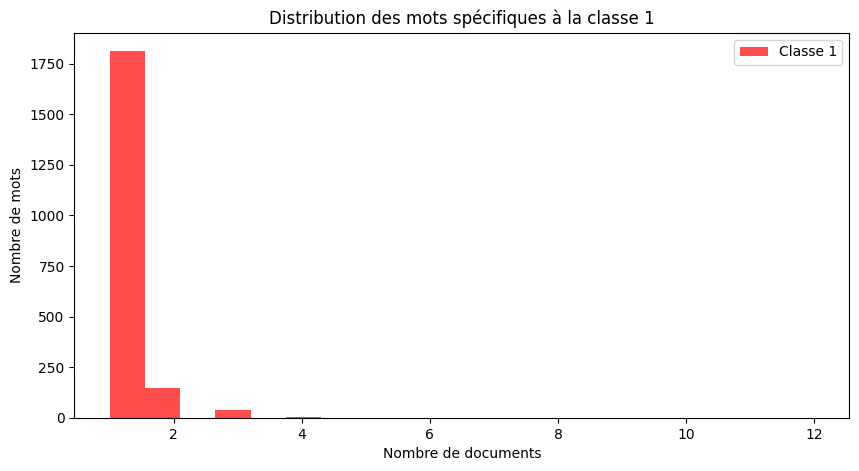

Nombre de mots spécifiques à la classe 0 : 13791
Nombre de mots spécifiques à la classe 1 : 2009


In [10]:
# On analyse les mots specifiques à une classe après la lemmetisation
mots_classe_0, mots_classe_1 = visualisation.class_specific_words( lemmatized_data_train, labels_train, lemmatized_vocab)


### Retrait des mots abberrants


In [ ]:
# Filtrons les mots qui n'apparraissent dans moins de 4 document 


filtered_data_train, filtered_data_test, filtered_vocab_map = nettoyage.filter_words_by_document_frequency(lemmatized_data_train, lemmatized_data_test, lemmatized_vocab, min_docs=4)

# Afficher les résultats
print("Matrice après filtrage :")
print(filtered_data_train.shape)
print("\nVocabulaire filtré :")
print(filtered_vocab_map)

Matrice après filtrage :
(9422, 8014)

Vocabulaire filtré :
['000' '001' '01' ... 'zhang' 'zone' 'zoom']


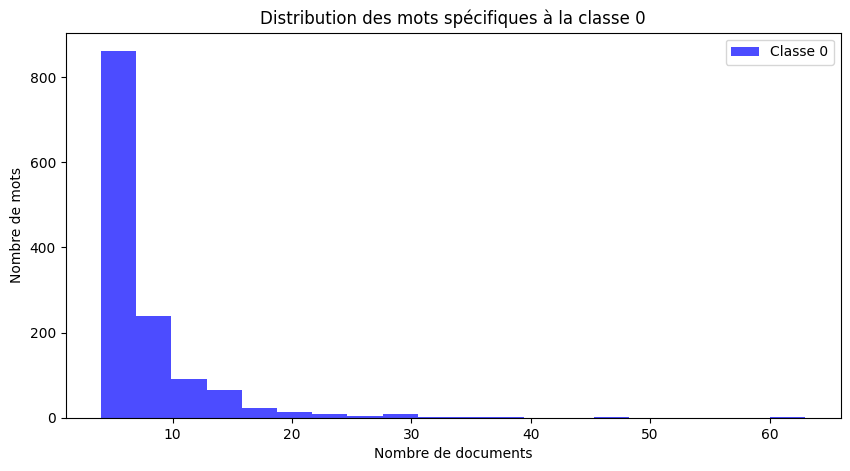

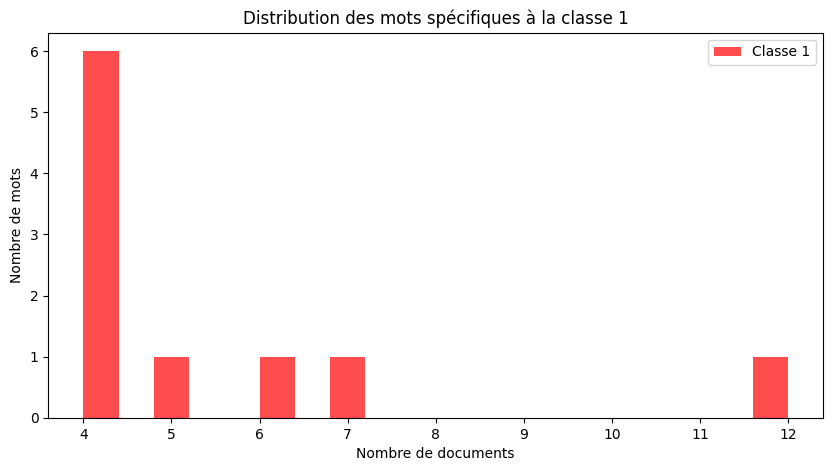

Nombre de mots spécifiques à la classe 0 : 1322
Nombre de mots spécifiques à la classe 1 : 10


In [7]:
# On analyse les mots specifiques à une classe après le filtrage
mots_classe_0, mots_classe_1 = visualisation.class_specific_words( filtered_data_train, labels_train, filtered_vocab_map)


### Application du test Mann-Whitney U 


In [ ]:
# Appliquer la fonction sorting par le test MWU 
sorted_data, sorted_vocab, sorted_scores, sorted_data_test = nettoyage.sort_data_by_significance(filtered_data_train, labels_train, filtered_vocab_map, data_test)

# Afficher les 10 premiers mots les plus significatifs avec leurs p-valeurs
print("Top 10 des mots les plus significatifs :")
for word, score in zip(sorted_vocab[:10], sorted_scores[:10]):
    print(f"{word}: p-value = {score}")

Top 10 des mots les plus significatifs :
convex: p-value = 8.37932285348839e-48
we: p-value = 2.649863354911786e-45
bound: p-value = 4.488920228999067e-37
gradient: p-value = 2.904219276609985e-35
our: p-value = 1.4297175234597226e-34
model: p-value = 7.958454523061302e-34
art: p-value = 8.641722532240372e-34
variational: p-value = 5.836855337327211e-30
system: p-value = 3.3107212223307356e-29
estimator: p-value = 1.8366248800935537e-27


## Creation de fonctionnalités

### Le nombre de chiffre  

In [ ]:
# Analyser le nombre de chiffres
p_value = feature_creation.analyze_digit_count(data_train, labels_train, vocab_map)

### Le sentiment 

In [ ]:

# Calculer les scores de sentiment et les ajouter aux données
data_with_sentiment = feature_creation.add_sentiment_feature(data_train, labels_train, vocab_map)

# Effectuer le test pour voir si les scores de sentiment diffèrent entre les classes
p_value = feature_creation.test_sentiment_feature(data_with_sentiment)

print("P-value du test de Mann-Whitney U sur les scores de sentiment :", p_value)
if p_value < 0.05:
    print("Les distributions de sentiment sont significativement différentes entre les classes.")
else:
    print("Les distributions de sentiment ne sont pas significativement différentes entre les classes.")

# Afficher les distributions des scores de sentiment par classe
feature_creation.plot_sentiment_distributions(data_with_sentiment)

### Le nombre de mots 

In [ ]:
# Analyser les distributions de longueur de texte par classe
feature_creation.analyze_text_length_distribution(data_train, labels_train)


### Le nombre de mots disctints

In [ ]:

# Chargement des données
data_train = np.load('data_train.npy', allow_pickle=True)
labels_train = pd.read_csv('label_train.csv')['label'].values

# Analyser les distributions du nombre de mots distincts par classe
feature_creation.analyze_unique_word_count_distribution(data_train, labels_train)

## Test D'algorithmes

In [3]:
# Appliquer la lemmatisation
lemmatized_data_train, lemmatized_vocab = nettoyage.lemmatize_data(data_train, vocab_map)
lemmatized_data_test, lemmatized_vocab = nettoyage.lemmatize_data(data_test, vocab_map)

# Filtrons les mots qui n'apparraissent dans moins de 4 document 
filtered_data_train, filtered_data_test, filtered_vocab_map = nettoyage.filter_words_by_document_frequency(lemmatized_data_train, lemmatized_data_test, lemmatized_vocab, min_docs=4)

# Appliquer la fonction sorting par le test MWU 
sorted_data_train, sorted_vocab, sorted_scores, sorted_data_test = nettoyage.sort_data_by_significance(filtered_data_train, labels_train, filtered_vocab_map, filtered_data_test)



# Ajouter les caractéristiques au dataset filtré
enriched_filtered_data_train = nettoyage.add_features_to_filtered_data(data_train, sorted_data_train, vocab_map, sorted_vocab)
enriched_filtered_data_test = nettoyage.add_features_to_filtered_data(data_test, sorted_data_test, vocab_map, sorted_vocab)

# Afficher les dimensions du dataset enrichi
print("Dimensions du dataset filtré enrichi :", enriched_filtered_data_train.shape)





Dimensions du dataset filtré enrichi : (9422, 8017)


In [ ]:

# Effectuer la recherche aléatoire pour Naïve Bayes
best_model, best_params, search_results = algo.random_search_naive_bayes(sorted_data, labels_train)

best_model, best_params, search_results = algo.bayesian_search_naive_bayes(sorted_data, labels_train)

# Afficher les résultats de la recherche
print(search_results.head())

Fitting 5 folds for each of 10 candidates, totalling 50 fits


python(79909) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(79910) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(79911) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(79912) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(79913) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(79914) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(79916) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(79917) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(79918) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(79919) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[CV] END ..........alpha=1.6751020408163266, fit_prior=False; total time=   7.0s
[CV] END ..........alpha=1.6751020408163266, fit_prior=False; total time=   7.0s
[CV] END ..........alpha=1.0659183673469388, fit_prior=False; total time=   6.8s
[CV] END ..........alpha=1.6751020408163266, fit_prior=False; total time=   6.9s
[CV] END ..........alpha=1.0659183673469388, fit_prior=False; total time=   6.8s
[CV] END ..........alpha=1.0659183673469388, fit_prior=False; total time=   6.8s
[CV] END ..........alpha=1.6751020408163266, fit_prior=False; total time=   7.0s
[CV] END ..........alpha=1.6751020408163266, fit_prior=False; total time=   7.0s
[CV] END ..........alpha=0.9034693877551021, fit_prior=False; total time=   7.3s[CV] END ..........alpha=1.0659183673469388, fit_prior=False; total time=   7.3s

[CV] END ...........alpha=1.4314285714285715, fit_prior=True; total time=   7.4s
[CV] END ..........alpha=1.0659183673469388, fit_prior=False; total time=   7.4s
[CV] END ...........alpha=1.

In [4]:

# Effectuer la recherche aléatoire
best_model, best_params = algo.random_search_logistic_regression(enriched_filtered_data_train, labels_train)
# Effectuer la recherche Bayesienne
best_model, best_params = algo.bayesian_optimization_logistic_regression(enriched_filtered_data_train, labels_train)

NameError: name 'enriched_filtered_data_train' is not defined

In [ ]:


# Optimiser le SVM linéaire avec recherche aléatoire
best_model, best_params = algo.random_search_linear_svm(enriched_filtered_data_train, labels_train)

# Optimiser le SVM linéaire avec recherche bayésienne
best_model, best_params = algo.bayesian_optimization_linear_svm(enriched_filtered_data_train, labels_train)



In [ ]:

# Effectuer la recherche aléatoire
best_model, best_params = algo.random_search_random_forest(enriched_filtered_data_train, labels_train)

# Efectuer la recherche bayésienne
best_model, best_params = algo.bayesian_optimization_random_forest(enriched_filtered_data_train, labels_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


python(85216) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(85217) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(85218) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(85219) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(85220) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(85221) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(85222) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(85223) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(85224) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(85226) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


KeyboardInterrupt: 

In [ ]:

algo.evaluate_models_with_pipelines(enriched_filtered_data_train, labels_train)

{'F1_macro': [0.7098514632697273], 'Accuracy': [0.7680939025832503]}
{'F1_macro': [0.7098514632697273, 0.4318680022406697], 'Accuracy': [0.7680939025832503, 0.7562089239554647]}


In [ ]:
algo.evaluate_models(enriched_filtered_data_train, labels_train)

## Prediction


In [ ]:
n  = 4000

selected_data_train = nettoyage.select_columns(enriched_filtered_data_train, n)

selected_data_test = nettoyage.select_columns(enriched_filtered_data_test, n)

In [ ]:
# Entraîner et prédire
predictions = algo.train_and_predict_multinomial_nb(selected_data_train, labels_train, selected_data_test, alpha=0.01, fit_prior=True)

NameError: name 'selected_data_train' is not defined